In [1]:
# 首先我们构造一个 有1000条元曲 和 1000个法律文件的df 
# df 的结构是 hue + value 
import os 
import json 
yuanqu = 'D:\GitHub\chinese-poetry\yuanqu\yuanqu.json'
yuanqu = open(yuanqu,'r')
yuanqu_content = json.load(yuanqu)
yuanqu_content

[{'dynasty': 'yuan',
  'author': '关汉卿',
  'paragraphs': ['半世为人，不曾教大人心困。', '虽是搽胭粉，只争不裹头巾，将那等不做人的婆娘恨。'],
  'title': '诈妮子调风月・仙吕/点绛唇'},
 {'dynasty': 'yuan',
  'author': '关汉卿',
  'paragraphs': ['男儿人若不依本分，一个抢白是非两家分。',
   '壮鼻凹硬如石铁，教满耳根都做了烧云。',
   '普天下汉子尽教都先有意，牢把定自己休不成人。',
   '虽然两家无意，便待一面成亲，不分晓便似包着一肚皮干牛粪。',
   '知人无意，及早抽身。'],
  'title': '诈妮子调风月・混江龙'},
 {'dynasty': 'yuan',
  'author': '关汉卿',
  'paragraphs': ['等不得水温，一声要面盆；恰递与面盆，一声要手巾；却执与手巾，一声解纽门。', '使的人无淹润、百般支分！。'],
  'title': '诈妮子调风月・那吒令'},
 {'dynasty': 'yuan',
  'author': '关汉卿',
  'paragraphs': ['入得房门，怎回身？厅独卧房儿窄窄别别，有甚铺呈？燕燕己身有甚么孝顺？拗不过哥哥行在意殷勤。'],
  'title': '诈妮子调风月・鹊踏枝'},
 {'dynasty': 'yuan',
  'author': '关汉卿',
  'paragraphs': ['卧地观经史，坐地对圣人。',
   '你观的国风、雅、颂施诂训，诵的典谟训诰居尧舜，（末云了）（正旦唱）说的温良恭俭行忠信。',
   '燕燕子理会得龙盘虎踞灭燕齐，谁会甚儿婚女聘成秦晋？（末云）这书院好。'],
  'title': '诈妮子调风月・寄生草'},
 {'dynasty': 'yuan',
  'author': '关汉卿',
  'paragraphs': ['这书房存得阿马，会得客宾。',
   '翠筠月朗龙蛇印，碧轩夜冷灯香信，绿窗雨细琴书润。',
   '每朝席上宴佳宾，抵多少"十年窗下无人问"！（末云住）（正旦唱）。'],
  'title': '诈妮子调风月・幺篇'},
 {'dynasty': 'yuan',

In [2]:
print("yuanqu_content type",type(yuanqu_content))
print("yuanqu num",len(yuanqu_content))
print("an example of yuanqu")
print(yuanqu_content[0])
print("type of a example:",type(yuanqu_content[0]))
print("paragraph:",yuanqu_content[0]['paragraphs'])

yuanqu_content type <class 'list'>
yuanqu num 11057
an example of yuanqu
{'dynasty': 'yuan', 'author': '关汉卿', 'paragraphs': ['半世为人，不曾教大人心困。', '虽是搽胭粉，只争不裹头巾，将那等不做人的婆娘恨。'], 'title': '诈妮子调风月・仙吕/点绛唇'}
type of a example: <class 'dict'>
paragraph: ['半世为人，不曾教大人心困。', '虽是搽胭粉，只争不裹头巾，将那等不做人的婆娘恨。']


In [3]:
num=0
with open("./yuanqu_sample_2000.txt",'w',encoding='utf-8') as f:
    i=0
    while(i<2000):
        contents = yuanqu_content[i]['paragraphs']
        line_yuanqu = " ".join(contents)
        if line_yuanqu!=None:
            f.write(line_yuanqu+'\n')
            i+=1
        

In [4]:
import sys
sys.path.append("../")
import re
from utensil.get_text import Case
case_reader = Case('../p2-1-2021.txt',encoding='utf-8')
with open("./yuanqu_sample_2000.txt",'a',encoding='utf-8') as f:
    i=0
    while(i<2000):
        contents  = case_reader.get_dict()[1]['content']
        if contents != None:
            contents = re.sub("\n",'',contents)
            f.write(contents+'\n')
            i+=1


In [6]:
import sys
sys.path.append('..')

# 这是我从hugging face 的网站找到预训练模型 
# 昨天经过我简单的对这个模型进行测试
# 发现他基本具有中文识别能力
from sentence_transformers import SentenceTransformer
import numpy as np

# 给出 读取案件数量，然后读取，嵌入，返回 
def embed(filename):
    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
    with open(filename,'r',encoding='utf-8') as f:
        content = f.readlines()
    embeddings = model.encode(content)
    print("embeded array shape:",embeddings.shape)
    return embeddings

y1 = ['yuanqu']*2000
y2 = ['casefile']*2000
y = y1+y2
y = np.array(y)
# 这个地方，numpy和seaborn 画图的时候一定要转换数据结构到object  
y = y.astype('object')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE 
# 画图 
# pca 和tsne 降维 

def painting(rounds=int,x=None,y=None):
    x_std = StandardScaler().fit_transform(x)
    x_pca = PCA(n_components=2).fit_transform(x_std)
    print(x_pca.shape)
    x_pca =np.vstack((x_pca.T ,y)).T
    print(x_pca.shape)
    df_pca = pd.DataFrame(x_pca,columns=['1st_Component','2nd_Component','class'])
    print(df_pca.head(20))
    plt.figure(figsize=(8,8))
    sns.scatterplot(data= df_pca,hue = 'class',x='1st_Component',y='2nd_Component')
    #plt.show()
    plt.savefig(str(rounds)+'round_pca.png')
    tsne = TSNE(n_components=2)
    x_tsne = tsne.fit_transform(x_std)
    print(x_tsne.shape)
    x_tsne =np.vstack((x_tsne.T ,y)).T
    print(x_tsne.shape)
    df_tsne=pd.DataFrame(x_tsne,columns=['Dim1','Dim2','class'])
    df_tsne.head
    plt.figure(figsize=(8,8))
    sns.scatterplot(data=df_tsne,hue ='class' , x='Dim1',y='Dim2')
    plt.savefig(str(rounds)+'round_tsne.png')

# 目的是 看看这embdding 的效果怎么样
# 从图上看起来还是不太行
# 初步的解决方案是：
# 重写文书 ， 降低噪音
# 提取关系，用图模型建模 




In [7]:
embedding = embed('yuanqu_sample_2000')


embeded array shape: (4000, 384)


(4000, 2)
(4000, 3)
   1st_Component 2nd_Component   class
0      11.234217      4.531363  yuanqu
1      10.198781      3.239949  yuanqu
2        9.91167      0.806395  yuanqu
3      11.601627      6.434007  yuanqu
4      10.188846      1.076712  yuanqu
5       8.783102     -3.238894  yuanqu
6      12.190675      5.706023  yuanqu
7      10.564431      5.954654  yuanqu
8      12.411509      6.559944  yuanqu
9       10.98051     -1.369802  yuanqu
10     10.025455     -0.549449  yuanqu
11      9.930378      3.878827  yuanqu
12       12.0409      4.088097  yuanqu
13     11.095382     -0.358539  yuanqu
14     13.432351     -0.929444  yuanqu
15     10.708171      5.052191  yuanqu
16     12.499766      2.390283  yuanqu
17     10.856166     -5.440984  yuanqu
18     10.383544       4.30683  yuanqu
19     10.778607      3.254537  yuanqu
(4000, 2)
(4000, 3)


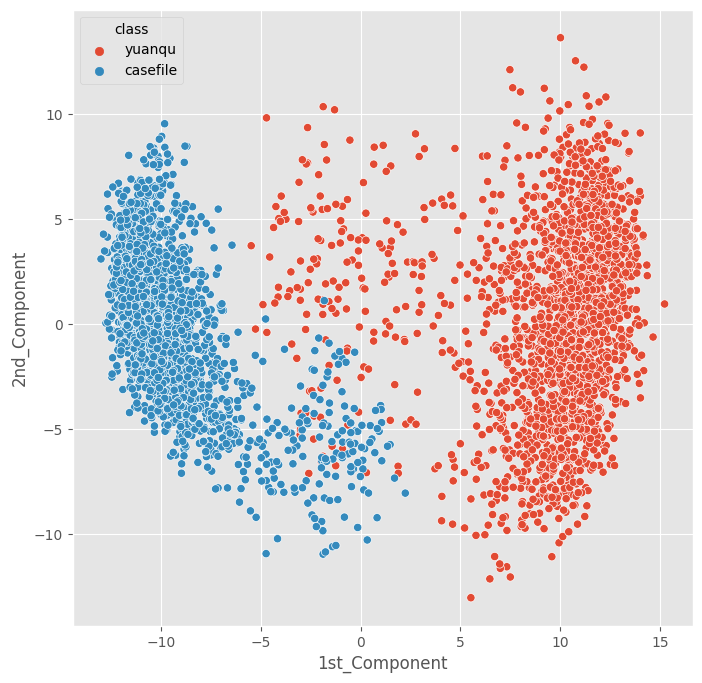

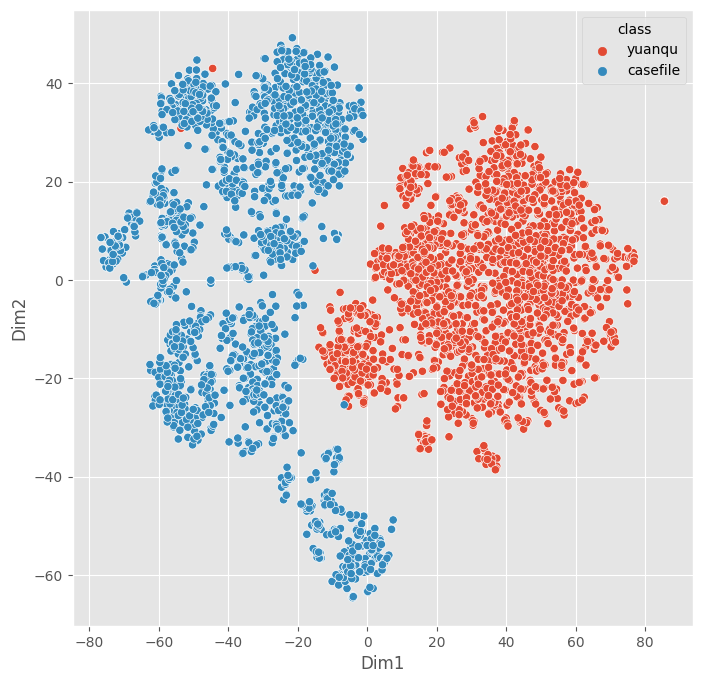

In [8]:
painting(24,embedding,y)

In [15]:
from sklearn.model_selection import train_test_split
X = embedding
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,stratify=y,shuffle=True) #按y比例分层抽样，通过用于分类问题

In [20]:
# 建立模型
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
X = embedding
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.95,stratify=y,shuffle=True) #按y比例分层抽样，通过用于分类问题
model = svm.SVC(C=10, kernel='linear')

# 训练模型,x为训练集， y为标签
model.fit(X_train, y_train)

# 预测,test为测试集
y_preds = model.predict(X_test)
report = metrics.classification_report(y_test,y_preds)
print(report)

              precision    recall  f1-score   support

    casefile       1.00      1.00      1.00      1900
      yuanqu       1.00      1.00      1.00      1900

    accuracy                           1.00      3800
   macro avg       1.00      1.00      1.00      3800
weighted avg       1.00      1.00      1.00      3800



In [24]:
n = 1
x_std = StandardScaler().fit_transform(embedding)
x_pca = PCA(n_components=n).fit_transform(x_std)
X_train,X_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.3,stratify=y,shuffle=True)
# 训练模型,x为训练集， y为标签
model.fit(X_train, y_train)

# 预测,test为测试集
y_preds = model.predict(X_test)
report = metrics.classification_report(y_test,y_preds)
print(report)

              precision    recall  f1-score   support

    casefile       0.96      0.96      0.96       600
      yuanqu       0.96      0.96      0.96       600

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



这里针对上一个实验发现这个384维的法律文本映射到二维空间之后连成一片的问题<br>
那么利用元曲和法律文本的对比，我们发现， 映射是有其特征在的<br>
所以，法律文本的特征可能还行<br>
这也提醒我们384->2 会损失很多信息<br>

In [21]:
lawsuit = embedding[2000:]
print(lawsuit.shape)

(2000, 384)


下一步我们可能去猜，不同的案由之间的分类好不好做<br>
然后去区别起因经过结果，将信息去噪音，提高分类的准确性 